# **FastSAM:**

In [1]:
!nvidia-smi

Mon Apr 15 17:03:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -U -q ultralytics supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 10.8 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
!unzip -q drive/MyDrive/DP/VEGA/data/YOLO/digits_original_crops.zip
!unzip -q drive/MyDrive/DP/VEGA/data/YOLO/glyphs_original_crops.zip

In [6]:
from ultralytics import FastSAM
from ultralytics.models.fastsam import FastSAMPrompt
from supervision import Detections, InferenceSlicer, BoxAnnotator, MaskAnnotator, plot_image
from supervision.draw.color import Color
from PIL import Image
import numpy as np
import cv2
!yolo checks

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.5/201.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


## Digits:

In [8]:
model = FastSAM("FastSAM-s.pt")

In [ ]:
digits_model_test_metrics = model.val(data="/content/digits_original_crops/data.yaml", split="test")

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 24.7MB/s]
val: Scanning /content/digits_original_crops/test/labels... 451 images, 0 backgrounds, 0 corrupt: 100%|██████████| 451/451 [00:00<00:00, 1298.10it/s]

val: New cache created: /content/digits_original_crops/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.53it/s]


                   all        451       6188      0.202      0.443      0.166     0.0294     0.0762     0.0537     0.0114    0.00148
Speed: 0.3ms preprocess, 11.5ms inference, 0.0ms loss, 3.3ms postprocess per image



0: 640x640 49 objects, 551.2ms
Speed: 3.8ms preprocess, 551.2ms inference, 178.7ms postprocess per image at shape (1, 3, 640, 640)


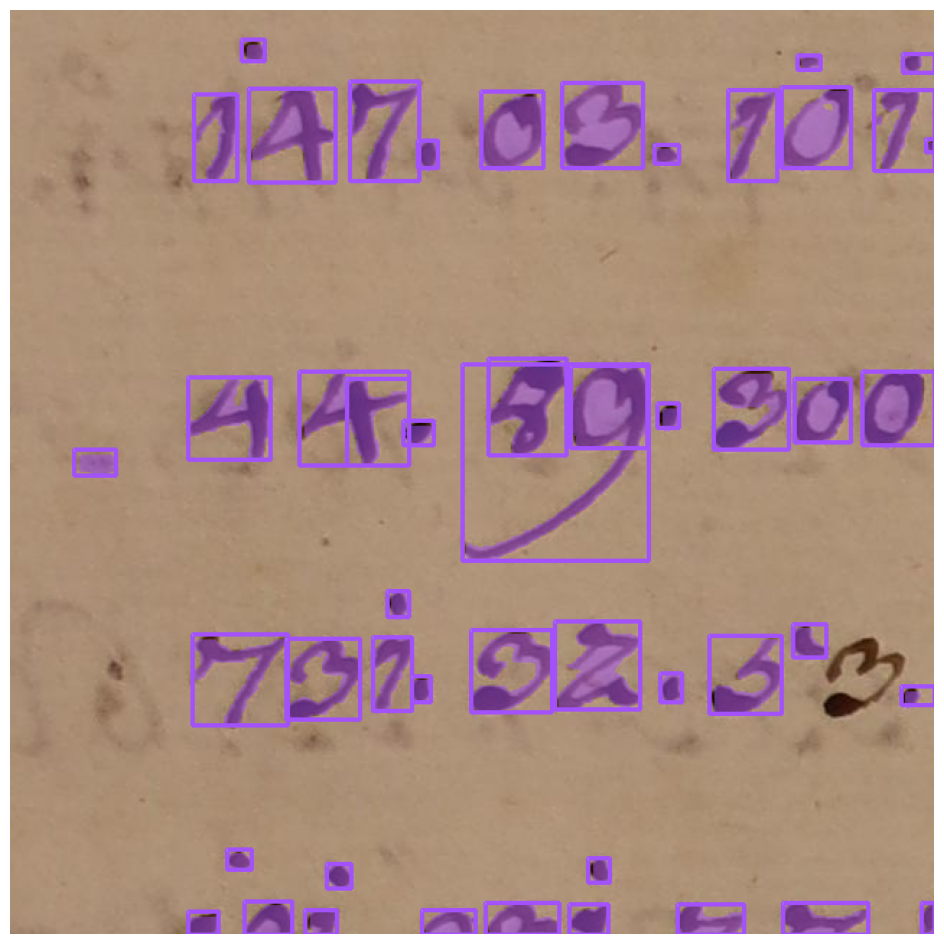

In [ ]:
model_results = model(
    source=cv2.imread("/content/digits_original_crops/test/images/IMG_1396_col320_row2240_jpg.rf.544b449487d06932a6292e1ef744ab20.jpg"),
    device="cpu",
    imgsz=640,
)

prompt_model = FastSAMPrompt(
    cv2.imread("/content/digits_original_crops/test/images/IMG_1396_col320_row2240_jpg.rf.544b449487d06932a6292e1ef744ab20.jpg"),
    model_results,
    device="cpu"
)

digits_detections = Detections.from_ultralytics(
    prompt_model.everything_prompt()[0]
)

digits_annotated_array = BoxAnnotator(
    text_color=Color.WHITE,
    thickness=2,
    text_scale=0.0,
    text_thickness=0,
    text_padding=0
).annotate(
    scene=cv2.imread("/content/digits_original_crops/test/images/IMG_1396_col320_row2240_jpg.rf.544b449487d06932a6292e1ef744ab20.jpg"),
    detections=digits_detections
)
digits_annotated_array = MaskAnnotator().annotate(
    scene=digits_annotated_array,
    detections=digits_detections
)
plot_image(digits_annotated_array)


0: 3200x2144 300 objects, 11923.6ms
Speed: 101.5ms preprocess, 11923.6ms inference, 22789.4ms postprocess per image at shape (1, 3, 3200, 2144)


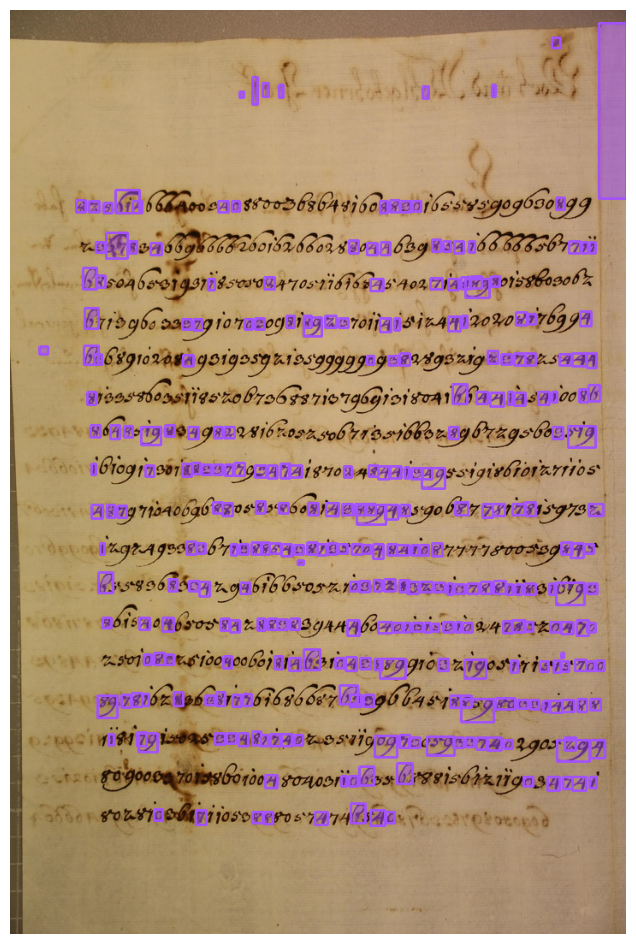

In [ ]:
model_results = model(
    source=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/digits1.jpg"),
    device="cpu",
    imgsz=3200,
)

prompt_model = FastSAMPrompt(
    cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/digits1.jpg"),
    model_results,
    device="cpu"
)

digits_detections = Detections.from_ultralytics(
    prompt_model.everything_prompt()[0]
)

digits_annotated_array = BoxAnnotator(
    text_color=Color.WHITE,
    thickness=2,
    text_scale=0.0,
    text_thickness=0,
    text_padding=0
).annotate(
    scene=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/digits1.jpg"),
    detections=digits_detections
)
digits_annotated_array = MaskAnnotator().annotate(
    scene=digits_annotated_array,
    detections=digits_detections
)
plot_image(digits_annotated_array)


0: 3200x2400 276 objects, 13151.6ms
Speed: 145.0ms preprocess, 13151.6ms inference, 21745.8ms postprocess per image at shape (1, 3, 3200, 2400)


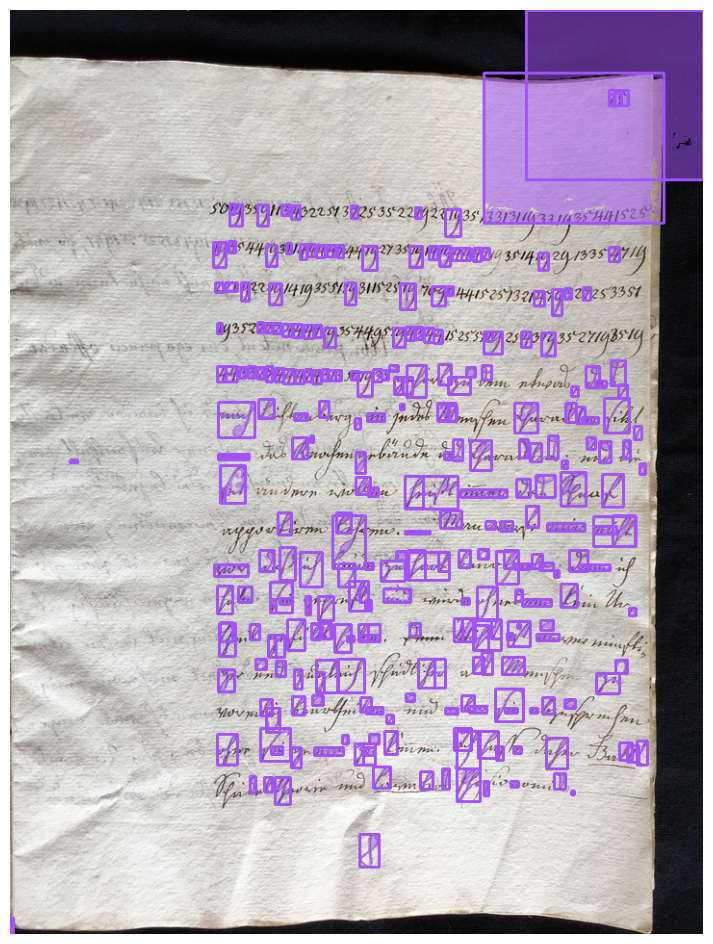

In [ ]:
model_results = model(
    source=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/letter7.jpg"),
    device="cpu",
    imgsz=3200,
)

prompt_model = FastSAMPrompt(
    cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/letter7.jpg"),
    model_results,
    device="cpu"
)

digits_detections = Detections.from_ultralytics(
    prompt_model.everything_prompt()[0]
)

digits_annotated_array = BoxAnnotator(
    text_color=Color.WHITE,
    thickness=2,
    text_scale=0.0,
    text_thickness=0,
    text_padding=0
).annotate(
    scene=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/letter7.jpg"),
    detections=digits_detections
)
digits_annotated_array = MaskAnnotator().annotate(
    scene=digits_annotated_array,
    detections=digits_detections
)
plot_image(digits_annotated_array)

## SAHI Digits:

In [ ]:
def digits_model_callback(x: np.ndarray) -> Detections:
    model_results = model(
      source=x,
      device="cpu",
      imgsz=640,
    )
    prompt_model = FastSAMPrompt(
        x,
        model_results,
        device="cpu"
    )
    result = prompt_model.everything_prompt()[0]
    result.mask = None
    return Detections.from_ultralytics(result)

In [ ]:
digits_sahi_model = InferenceSlicer(
    callback=digits_model_callback,
    slice_wh=(160, 160),
    overlap_ratio_wh=(0.3, 0.3)
)


0: 640x640 1 object, 562.2ms
Speed: 5.2ms preprocess, 562.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 object, 493.9ms
Speed: 3.2ms preprocess, 493.9ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 objects, 516.0ms
Speed: 4.0ms preprocess, 516.0ms inference, 19.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 objects, 510.9ms
Speed: 4.0ms preprocess, 510.9ms inference, 15.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 objects, 509.6ms
Speed: 3.3ms preprocess, 509.6ms inference, 21.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 objects, 688.4ms
Speed: 3.4ms preprocess, 688.4ms inference, 37.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x192 4 objects, 248.1ms
Speed: 2.3ms preprocess, 248.1ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 192)

0: 640x640 11 objects, 715.5ms
Speed: 4.3ms preprocess, 715.5ms inference, 54.5ms postprocess 

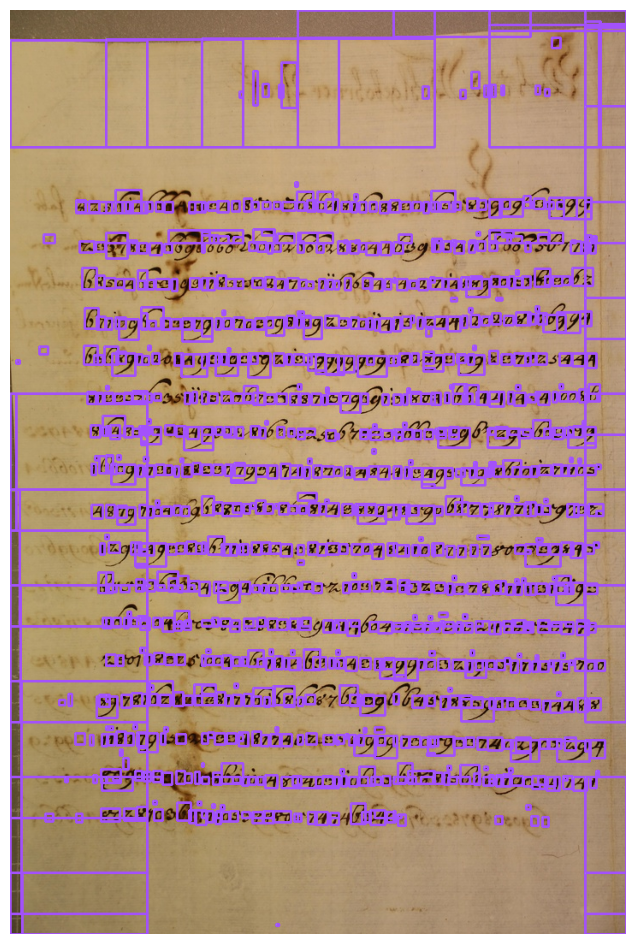

In [ ]:
digits_sahi_detections = digits_sahi_model(
    image=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/digits1.jpg"),
)

digits_annotated_array = BoxAnnotator(
    text_color=Color.WHITE,
    thickness=2,
    text_scale=0.0,
    text_thickness=0,
    text_padding=0
).annotate(
    scene=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/digits1.jpg"),
    detections=digits_sahi_detections
)
plot_image(digits_annotated_array)


0: 640x640 1 object, 1111.0ms
Speed: 4.2ms preprocess, 1111.0ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 objects, 722.1ms
Speed: 6.2ms preprocess, 722.1ms inference, 11.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 object, 724.7ms
Speed: 3.0ms preprocess, 724.7ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 object, 558.6ms
Speed: 3.3ms preprocess, 558.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 objects, 461.2ms
Speed: 3.1ms preprocess, 461.2ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 objects, 496.3ms
Speed: 3.3ms preprocess, 496.3ms inference, 18.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x192 2 objects, 156.7ms
Speed: 1.7ms preprocess, 156.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 192)

0: 640x640 (no detections), 465.4ms
Speed: 3.3ms preprocess, 465.4ms inference, 0.7ms postproce

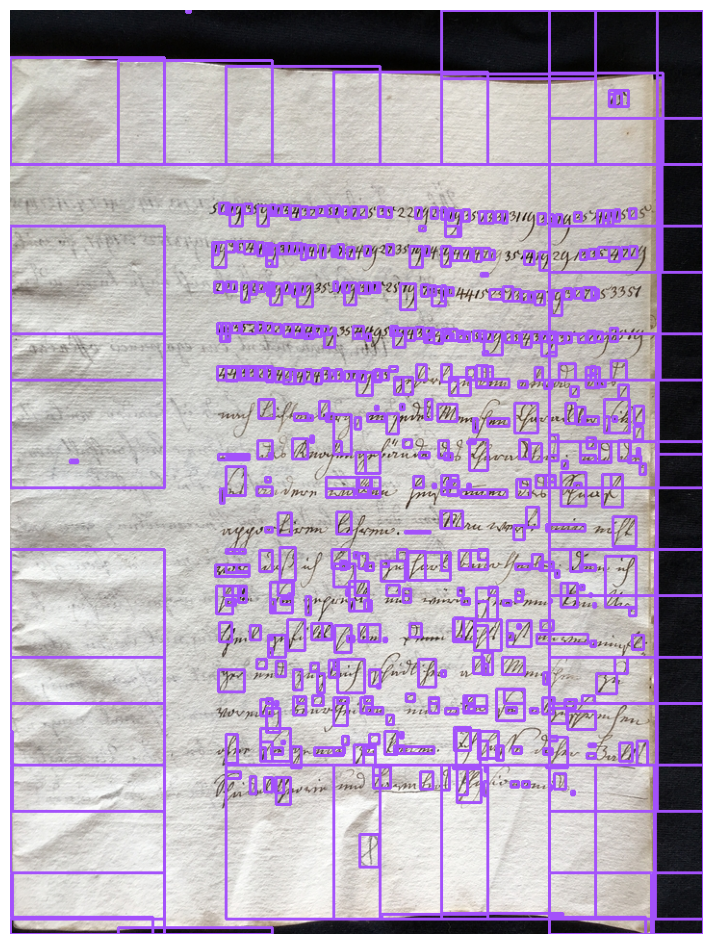

In [ ]:
digits_sahi_detections = digits_sahi_model(
    image=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/letter7.jpg"),
)

digits_annotated_array = BoxAnnotator(
    text_color=Color.WHITE,
    thickness=2,
    text_scale=0.0,
    text_thickness=0,
    text_padding=0
).annotate(
    scene=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/letter7.jpg"),
    detections=digits_sahi_detections
)
plot_image(digits_annotated_array)

## Glyphs:

In [ ]:
digits_model_test_metrics = model.val(data="/content/glyphs_original_crops/data.yaml", split="test")

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/glyphs_original_crops/test/labels... 1627 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1627/1627 [00:01<00:00, 1421.94it/s]


val: New cache created: /content/glyphs_original_crops/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:30<00:00,  3.38it/s]


                   all       1627       3656      0.452      0.648      0.483      0.175      0.211       0.29      0.111     0.0192
Speed: 0.3ms preprocess, 11.2ms inference, 0.0ms loss, 1.3ms postprocess per image



0: 640x640 29 objects, 542.4ms
Speed: 3.7ms preprocess, 542.4ms inference, 82.6ms postprocess per image at shape (1, 3, 640, 640)


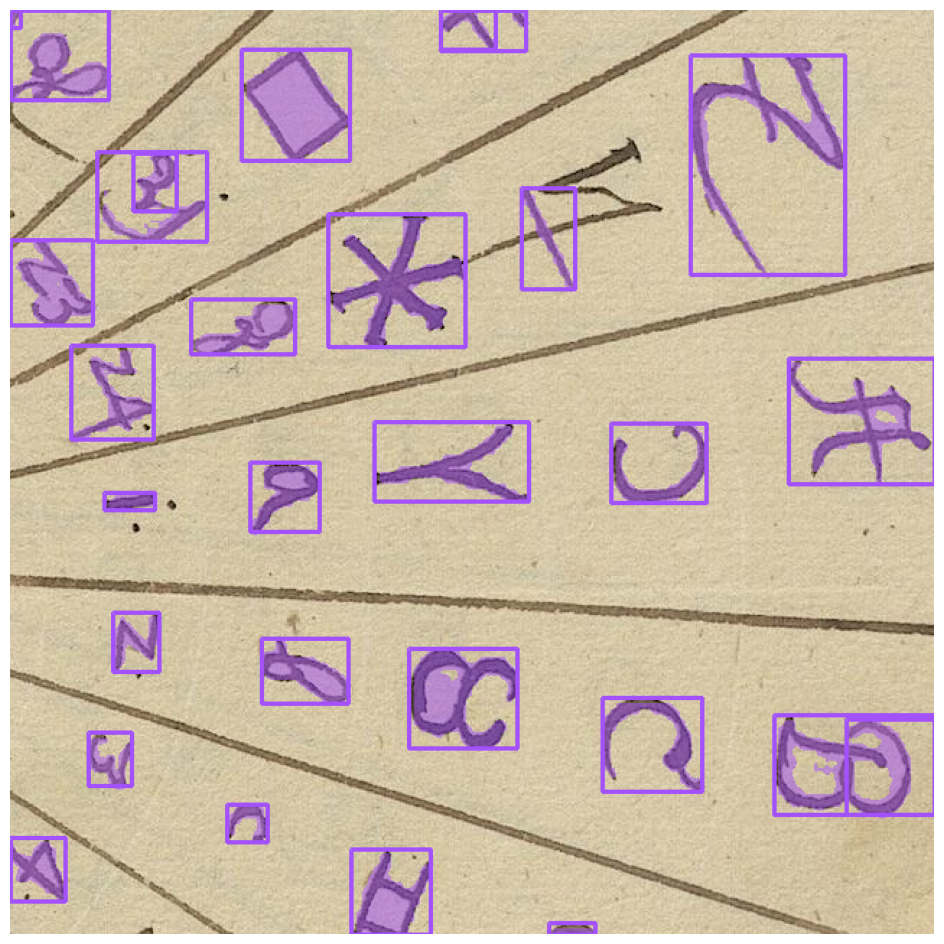

In [ ]:
model_results = model(
    source=cv2.imread("/content/glyphs_original_crops/test/images/hhstaw_130_i_1576_0089_jpg_col1600_row1600_jpg.rf.40fc3cd09c8d0440a4cea59cad864d2f.jpg"),
    device="cpu",
    imgsz=640,
)

prompt_model = FastSAMPrompt(
    cv2.imread("/content/glyphs_original_crops/test/images/hhstaw_130_i_1576_0089_jpg_col1600_row1600_jpg.rf.40fc3cd09c8d0440a4cea59cad864d2f.jpg"),
    model_results,
    device="cpu"
)

glyphs_detections = Detections.from_ultralytics(
    prompt_model.everything_prompt()[0]
)

glyphs_annotated_array = BoxAnnotator(
    text_color=Color.WHITE,
    thickness=2,
    text_scale=0.0,
    text_thickness=0,
    text_padding=0
).annotate(
    scene=cv2.imread("/content/glyphs_original_crops/test/images/hhstaw_130_i_1576_0089_jpg_col1600_row1600_jpg.rf.40fc3cd09c8d0440a4cea59cad864d2f.jpg"),
    detections=glyphs_detections
)
glyphs_annotated_array = MaskAnnotator().annotate(
    scene=glyphs_annotated_array,
    detections=glyphs_detections
)
plot_image(glyphs_annotated_array)


0: 3200x2144 211 objects, 234.4ms
Speed: 92.7ms preprocess, 234.4ms inference, 96.6ms postprocess per image at shape (1, 3, 3200, 2144)


SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


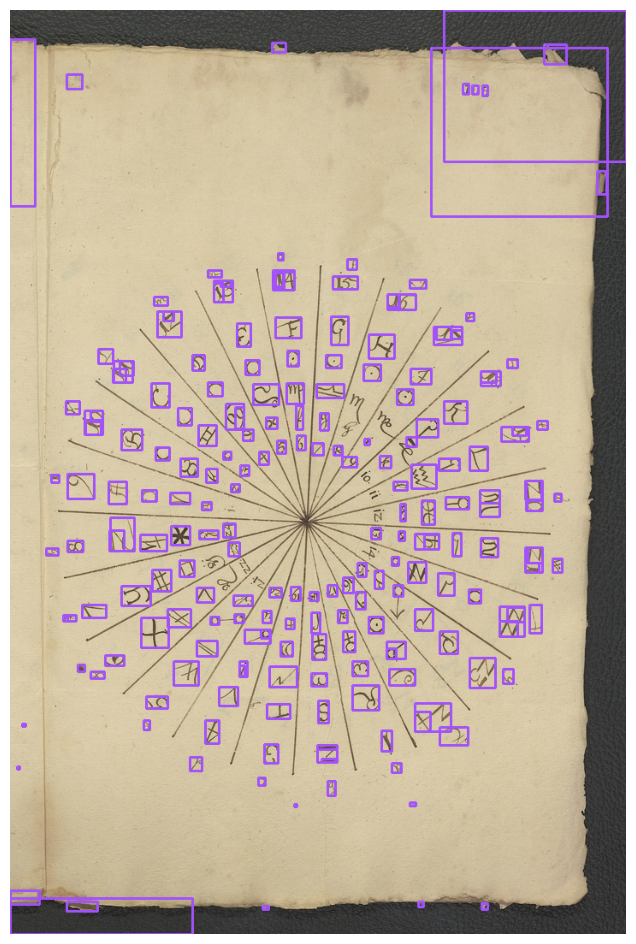

In [19]:
glyphs_detections = Detections.from_ultralytics(
    model.predict(
        source=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/glyphs1.jpg"),
        imgsz=3200
    )[0]
)

glpyhs_annotated_array = BoxAnnotator(
    text_color=Color.WHITE,
    thickness=2,
    text_scale=0.0,
    text_thickness=0,
    text_padding=0
).annotate(
    scene=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/glyphs1.jpg"),
    detections=glyphs_detections
)
plot_image(glpyhs_annotated_array)

## SAHI Glyphs:

In [ ]:
def glyphs_model_callback(x: np.ndarray) -> Detections:
    model_results = model(
      source=x,
      device="cpu",
      imgsz=640,
    )
    prompt_model = FastSAMPrompt(
        x,
        model_results,
        device="cpu"
    )
    result = prompt_model.everything_prompt()[0]
    result.mask = None
    return Detections.from_ultralytics(result)

In [ ]:
glyphs_sahi_model = InferenceSlicer(
    callback=glyphs_model_callback,
    slice_wh=(160, 160),
    overlap_ratio_wh=(0.3, 0.3)
)


0: 640x640 2 objects, 499.4ms
Speed: 5.6ms preprocess, 499.4ms inference, 9.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 object, 517.0ms
Speed: 3.4ms preprocess, 517.0ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 objects, 500.4ms
Speed: 3.3ms preprocess, 500.4ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 object, 507.6ms
Speed: 4.4ms preprocess, 507.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 objects, 508.5ms
Speed: 3.2ms preprocess, 508.5ms inference, 20.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 objects, 501.5ms
Speed: 3.9ms preprocess, 501.5ms inference, 17.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x192 4 objects, 181.4ms
Speed: 1.5ms preprocess, 181.4ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 192)

0: 640x640 1 object, 490.0ms
Speed: 3.4ms preprocess, 490.0ms inference, 4.5ms postprocess per i

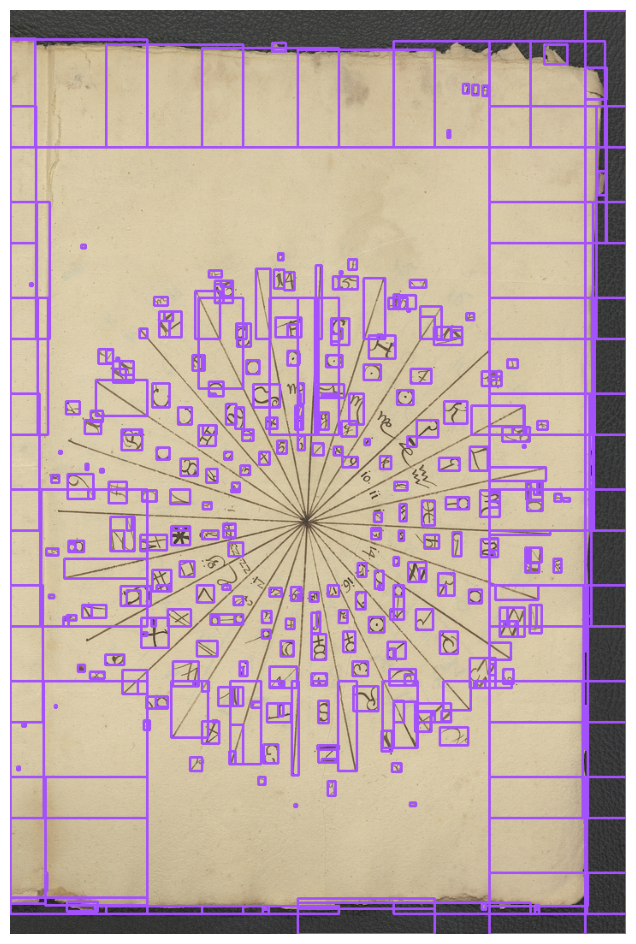

In [ ]:
glyphs_sahi_detections = glyphs_sahi_model(
    image=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/glyphs1.jpg"),
)

glyphs_annotated_array = BoxAnnotator(
    text_color=Color.WHITE,
    thickness=2,
    text_scale=0.0,
    text_thickness=0,
    text_padding=0
).annotate(
    scene=cv2.imread("/content/drive/MyDrive/DP/VEGA/data/BENCHMARK/glyphs1.jpg"),
    detections=glyphs_sahi_detections
)
plot_image(glyphs_annotated_array)